In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Bioproject

In [3]:
projects = pd.read_json('venancio.json')
projects.columns = ['BioProject', 'N', 'Part', 'Title', 'Abstract', 'DOI', 'PMID']
projects

,BioProject,N,Part,Title,Abstract,DOI,PMID
0,PRJNA360609,8,seedling: 8,Transgenic and conventional cultivar compariso...,Soybean is one of the main sources of oil worl...,10.1105/tpc.18.00662,31227558
1,PRJNA369113,36,leaf: 36,Circadian transcriptome of soybean unifoliolat...,The goal of this study is to obtain the circad...,10.1073/pnas.1708508116,31676549
2,PRJNA369414,21,embryo: 15 | cotyledon: 6,Genome-Wide Reinforcement of DNA Methylation O...,Tissue culture is a major method for plant reg...,None,None
3,PRJNA369483,6,seed: 6,Characterizing seed weight related genes throu...,Cultivated soybean has domesticated in China f...,http://dx.doi.org/10.1007/s00299-017-2165-5,28653111
4,PRJNA372408,1,shoot: 1,Gene expression analysis of Glycine max willia...,Transcriptome sequencing as part of the JGI Fl...,None,None
...,...,...,...,...,...,...,...
489,PRJNA827520,6,leaf: 6,Glycine max Transcriptome or Gene expression,Glycine max treate with water or GZM to test t...,None,None
490,PRJNA827666,6,root: 6,Study on improvement of water and nutrient upt...,Application and/or natural Silicates (Si) is c...,None,None
491,PRJNA832118,24,leaf: 24,Glycine max Transcriptome or Gene expression,Transgenic GmFT3a soybean,None,None
492,PRJNA833532,12,root: 12,Glycine max Raw sequence reads,soybean aluminum stress,None,None


In [4]:
estreses = ['drought', 'yield', 'acid', 'inoculation', 'fungal', 'pathogen']
for estres in estreses:
    print(estres + ': ' + str(projects['Abstract'].str.contains(estres).sum()))

drought: 22
yield: 26
acid: 12
inoculation: 10
fungal: 4
pathogen: 15


# Joined

In [5]:
joined = pd.read_csv('joined.csv')

/tmp/ipykernel_98454/1891019688.py:1: DtypeWarning: Columns (64,99,100,125,126,136,137,142,143,145,149,151,165,170,171,177,180,181,183,184,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,203,204,205,206,207,208,209,211,216,217,218,219,224,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,297,300,301,302,308,311,312,317,318,322,324,325,328,330,331,332,333,334,335,336,337,339,340,341,342,343,344,345,346,347,348,350,351,352,353,354,355,356,357,358,359,360,362,363) have mixed types. Specify dtype option on import or set low_memory=False.
  joined = pd.read_csv('joined.csv')


Text(0.5, 1.0, 'densidad de NAs por columna')

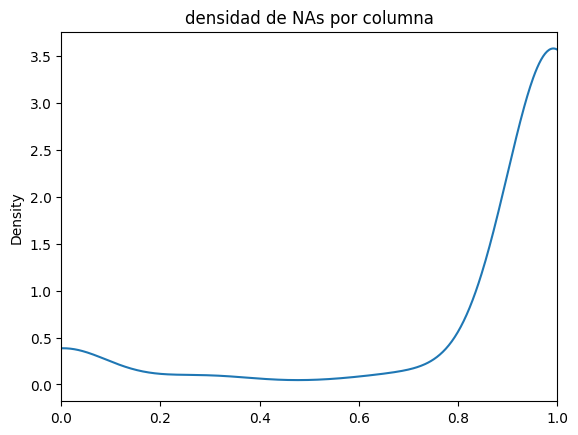

In [6]:
joined.isna().mean().plot.density()
plt.xlim(0, 1)
plt.title('densidad de NAs por columna')

In [59]:
joined.apply(lambda col: col.str.contains('control'), axis=1).mean(skipna=False).sort_values(ascending=False)

attributes           0.02298
jattr               0.018384
sample_name         0.002911
biosample                0.0
librarysource            0.0
                      ...   
InitialTimePoint         NaN
Authors                  NaN
HostIndividual           NaN
barcodesequence          NaN
scientific_name          NaN
Length: 364, dtype: object

In [8]:
joined.sample_title_sam.unique()

array([nan, 'control_20160916_rep1', 'thinning_20160916_rep2',
       'thinning_20160930_rep2', 'control_20160930_rep1',
       'control_20160930_rep2', 'Internodes of soybean, sampling 3',
       'thinning_20160916_rep1', 'control_20160916_rep2',
       'Internodes of soybean, sampling 1', 'thinning_20160930_rep1',
       'Internodes of soybean, sampling 2', 'Glycine max RNA-Seq',
       'Roots of soybean, sampling 1', 'Roots of soybean, sampling 3',
       'Roots of soybean, sampling 2'], dtype=object)

In [60]:
joined.apply(lambda col: col.str.contains('drought'), axis=1).mean(skipna=False).sort_values(ascending=False)

attributes           0.00743
sample_name         0.004366
jattr               0.003217
biosample                0.0
librarysource            0.0
                      ...   
InitialTimePoint         NaN
Authors                  NaN
HostIndividual           NaN
barcodesequence          NaN
scientific_name          NaN
Length: 364, dtype: object

In [10]:
joined['isolation_source_sam'].unique()

array([nan, "['missing']", "['not collected']", "['not provided']",
       "['Mixture of SMV strains SC1 and SC3']",
       "['Palnt pathology, PDKV Akola']", "['Well-watered']", "['LNLP']",
       "['plant']", "['drought']", "['HN']", "['field cultivation']",
       "['not applicable']", "['LN']", "['leaf']"], dtype=object)

Quiero hacer esto para toda columna, con palabras clave

In [48]:
def cols_match(row, pat):
    row
    return row[row.astype(str).str.contains(pat, regex=False).fillna(False)].index.to_list()

In [49]:
kws = ['control', 'stress', 'drought', 'bacteria', 'inoculated', 'flood']

In [50]:
stresses = pd.DataFrame(joined['biosample'])
for kw in kws:
    stresses[kw] = joined.apply(lambda row: cols_match(row, kw), axis=1)
stresses.to_csv('stresses.csv')

In [51]:
stresses_len = stresses.map(len)
stresses_len

,biosample,control,stress,stressed,drought,bacteria,inoculated,flood
0,12,0,0,0,0,0,0,0
1,12,0,0,0,0,0,0,0
2,12,0,0,0,0,0,0,0
3,12,0,0,0,0,0,0,0
4,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
13050,12,0,3,0,0,0,0,0
13051,12,0,0,0,0,0,3,0
13052,12,0,0,0,0,0,0,0
13053,12,0,0,0,0,0,0,0


In [81]:
stresses_len.where(stresses_len == 0).isna().sum()

biosample     13055
control         494
stress         1157
stressed         44
drought         136
bacteria          0
inoculated      167
flood             0
dtype: int64

In [89]:
indicators = {}
kw = 'stress'
for i in stresses[stresses_len[kw] != 0].index:
    stresses.loc[i, kw] != []
    indicators[joined.loc[i, 'biosample']] = joined.loc[i, stresses.loc[i, kw]]

In [90]:
indicators

{'SAMN21359827': attributes    [{k=assemblyname, v=GCA_000004515.4}, {k=bases...
 jattr         {"assemblyname": "GCA_000004515.4", "bases": 2...
 age_sam                        ['60 minutes after iron stress']
 Name: 12820, dtype: object,
 'SAMN21359678': attributes    [{k=bases, v=4147950}, {k=bytes, v=1762869}, {...
 jattr         {"bases": 4147950, "bytes": 1762869, "run_file...
 age_sam                        ['60 minutes after iron stress']
 Name: 1587, dtype: object,
 'SAMN21359672': attributes    [{k=bases, v=1965359400}, {k=bytes, v=67884468...
 jattr         {"bases": 1965359400, "bytes": 678844681, "run...
 age_sam                        ['60 minutes after iron stress']
 Name: 12486, dtype: object,
 'SAMN10588623': attributes                [{k=assemblyname, v=assembly}, {k=bases, v=144...
 jattr                     {"assemblyname": "assembly", "bases": 14458128...
 treatment_sam_ss_dpl55    ['produced under Early Soybean Production Syst...
 treatment                 produce